## 批量梯度下降

准备数据：

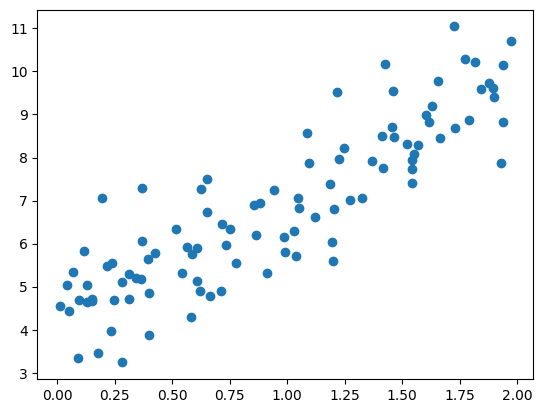

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)
m = 100  # 样本数m
X = 2 * np.random.rand(m, 1)  # 一维特征值X
y = 4 + 3 * X + np.random.randn(m, 1)  # 预测结果y
X_b = add_dummy_feature(X)  # 给特征值添加x0维度

# 准备两个测试样本: x_new_b
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)

fig, ax = plt.subplots()
ax.scatter(X, y)

利用批量梯度下降的公式(矩阵运算)，观察不同学习率的迭代过程：

$$\bigtriangledown_{\theta} MSE(\theta) = \begin{pmatrix}
\frac{\partial}{\partial \theta_0}MSE(\theta)\\ 
\frac{\partial}{\partial \theta_1}MSE(\theta)\\ 
...\\ 
\frac{\partial}{\partial \theta_n}MSE(\theta)\\ 
\end{pmatrix} = \frac{2}{m}X^T \cdot (X \cdot \theta - y)$$

$$ \theta^{(next step)} = \theta - \eta \bigtriangledown_{\theta} MSE(\theta)$$

eta=0.02, theta=[[4.21438446]
 [2.77074177]]
eta=0.1, theta=[[4.21509616]
 [2.77011339]]
eta=0.5, theta=[[-7.05138935e+27]
 [-7.98621001e+27]]


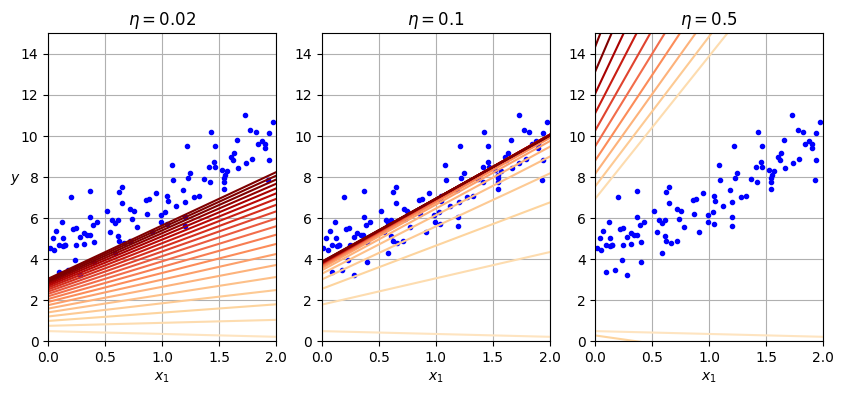

In [19]:
# 画出每次迭代后的拟合直线
def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            # 学习曲线的变化
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
# 初始参数theta，通过每次迭代进行修正
theta = np.random.randn(2, 1)

plt.figure(figsize=(10, 4))

plt.subplot(131)
theta_path = plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
print(f'eta=0.02, theta={theta_path[-1]}')

plt.subplot(132)
theta_path = plot_gradient_descent(theta, eta=0.1)
print(f'eta=0.1, theta={theta_path[-1]}')

plt.subplot(133)
theta_path = plot_gradient_descent(theta, eta=0.5)
print(f'eta=0.5, theta={theta_path[-1]}')
